<a href="https://colab.research.google.com/github/gamadi22/Clases-2022-23/blob/main/%5B0%5D_HRD_Tutorial_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.13


# Realización de un diagrama HR con el conjunto de datos Hipparcos
- El objetivo de este tutorial es mostrar cómo se puede realizar el análisis exploratorio de datos (EDA) utilizando python, en el catálogo original de Hipparcos. El EDA se inicia mejor con un Diagrama de Hertzsprung-Russel (HRD) que muestra la relación entre la temperatura y la luminosidad, o la magnitud absoluta y el índice de color entre las estrellas.

### El conjunto de datos Hipparcos

<img src="https://sci.esa.int/star_mapper/img/b63db3f5fdfa2a35cd693c39d6ace9d8.png" style="width: 600px;"/>

From the [European Space Agency website:](https://sci.esa.int/web/hipparcos)



>La primera misión espacial para medir la posición, la distancia, el movimiento, el brillo y el color de las estrellas**, la astrometría, como la llaman los expertos, es única en Europa. El satélite Hipparcos de la ESA ha localizado más de 100.000 estrellas, con una precisión 200 veces superior a la de cualquier otro satélite. Como la astrometría ha sido la base del estudio del Universo desde la antigüedad, este salto adelante ha afectado a todas las ramas de la astronomía. El principal producto de esta pionera y exitosa misión fue un conjunto de catálogos estelares, los catálogos **Hipparcos** y Tycho, publicados por la ESA en 1997.

**Ejemplo de investigación realizada con el conjunto de datos Hipparcos**

Paper Title:
[Cosmography of OB stars in the solar neighbourhood](https://www.aanda.org/articles/aa/abs/2015/12/aa27058-15/aa27058-15.html)

### Campos significativos:

__1. `HIP`__
   - Número/identificador Hipparcos; es el número de identificación de cualquier estrella dentro del catálogo Hipparcos. Utilizaremos este número como índice de nuestro marco de datos.
   
__2. `RAICRS` & `DEICRS`__
   - Ascensión recta y declinación en coordenadas ecuatoriales en grados. (ICRS, Epoch=J1991.25)
    
<img src="http://www.pas.rochester.edu/~blackman/ast104/celestialtime.gif" />
<center><em>Image credit: http://www.pas.rochester.edu/~blackman/ast104/celestialtime.gif </em></center>


__3. `Vmag`__
   - Magnitud visual: nos indica el brillo de una estrella, o en general de cualquier objeto celeste, visto desde la Tierra.
    
<img src="https://en.es-static.us/upl/2017/03/apparent-magnitude-scale-e1490133992818.jpg" />
<center><em>Image credit: https://en.es-static.us/upl/2017/03/apparent-magnitude-scale-e1490133992818.jpg </em></center>

__4. `Plx`__ 
   - Ángulo de paralaje en miliarcosegundos; distancia (en pársecs) de la Tierra/Sol a una estrella utilizando el paralaje trigonométrico. La distancia Tierra-Sol es insignificante comparada con la distancia entre estrellas.

<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/imgast/Stelpar.gif" />
<center><em>Image credit: http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/imgast/Stelpar.gif </em></center>

__5. `B-V`__ 
   - Índice de color, región azul a visible del espectro EM; indica el color de la estrella, que está correlacionado con su temperatura. 
   
   Valores de la tabla de: [¿De qué color son las estrellas?](http://www.vendian.org/mncharity/dir3/starcolor/details.html)
    
<img src="https://www.esri.com/arcgis-blog/wp-content/uploads/2018/03/colorChart2.png" />

__6. `SpType`__

   - Tipo espectral. Clasificación de las estrellas O,B,A,F,G,K,M en función de la temperatura.

<img src="https://pages.uoregon.edu/jimbrau/BrauImNew/Chap17/FG17_t02.jpg" />
<center><em>Image credit: https://pages.uoregon.edu/jimbrau/BrauImNew/Chap17/FG17_t02.jpg </em></center>

### Bibliotecas requeridas:

- Necesitamos instalar las siguientes bibliotecas para ejecutar el diagrama 2D. 
    - [`Numpy`](https://numpy.org/) y [`pandas`](https://pandas.pydata.org/) se utilizan para el análisis numérico y basado en el marco de datos, y `Matplotlib` para crear el diagrama HR.

- [`Astroquery`](https://astroquery.readthedocs.io/en/latest/) se utiliza para acceder al [servicio web VizieR](https://vizier.u-strasbg.fr/) con el fin de descargar el catálogo Hipparcos.
- [`Astropy`](https://www.astropy.org/) se utiliza para facilitar los cálculos astrofísicos rutinarios.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 4.2 MB/s 
     |████████████████████████████████| 832 kB 60.1 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 4.0 MB 34.3 MB/s 


In [ ]:
from astroquery.vizier import Vizier
from astropy.table import Table

Vizier.ROW_LIMIT = -1

- Seleccionamos sólo las columnas que necesitamos y las ponemos en un DataFrame usando Pandas.
- El conjunto de datos tiene un total de 118.218 filas/estrellas, y se establece `Vizier.ROW_LIMIT = -1` nos permite descargar el catálogo en su totalidad, en lugar de sólo 50 filas.

# I. Descarga del conjunto de datos Hipparcos utilizando [`VizieR`](https://vizier.u-strasbg.fr/)

- El [Catálogo Principal de Hipparcos](https://heasarc.gsfc.nasa.gov/W3Browse/all/hipparcos.html) puede ser consultado directamente desde [el sitio web de Vizier](http://vizier.u-strasbg.fr/viz-bin/VizieR-3?-source=I/239/hip_main). 

- Seleccionamos sólo las columnas que necesitamos, que se mencionan arriba, para el HRD y las ponemos en un DataFrame usando Pandas.

- Sin embargo, los atributos `RAICRS` y `DEICRS` serán útiles para nuestros futuros tutoriales de trazado.

In [ ]:
hip = ['HIP',
       'RAICRS', 'DEICRS', 
       'Vmag', 'Plx',
       'B-V', 'SpType']
I239 = Vizier(columns=hip, catalog='I/239/hip_main', row_limit=-1).query_constraints()
hip = I239[0]
hip_df = hip.to_pandas()
hip_df

,HIP,RAICRS,DEICRS,Vmag,Plx,B-V,SpType
0,21662,69.766159,76.974350,8.11,3.49,1.064,K0
1,21663,69.766591,10.398945,9.44,5.02,0.500,F2
2,21664,69.767548,67.200933,7.79,2.80,0.065,A0
3,21666,69.767870,-51.672796,6.45,4.97,1.321,K2III
4,21665,69.768076,-50.479585,9.13,7.69,0.397,F0V
...,...,...,...,...,...,...,...
118213,21656,69.745482,22.325166,9.86,5.35,0.514,F2
118214,21658,69.749206,-5.773619,9.05,1.80,1.036,G5
118215,21659,69.755815,48.567976,11.36,18.49,0.798,M0
118216,21660,69.760595,-56.166142,9.35,3.59,0.521,F5/F6IV/V


- Inspeccionar los tipos de datos.

In [ ]:
hip_df.dtypes

HIP         int32
RAICRS    float64
DEICRS    float64
Vmag      float32
Plx       float32
B-V       float32
SpType     object
dtype: object

### Crear directorios

- Esto nos ayudará a organizar nuestros archivos generados.

In [ ]:
import os

In [ ]:
try:
    os.makedirs('Data//df')
except OSError:
    pass

try:
    os.makedirs('Data//img')
except OSError:
    pass

# II. Creación de nuevas columnas

Vamos a "ampliar" el conjunto de datos de Hipparcos creando nuevas columnas para la `distancia en pc` y la `magnitud absoluta`.

### A. Distancia en parsec `Pc`

Crear una nueva columna para la distancia $d$, que es `Pc` y se basa en los ángulos de paralaje $\varpi$. Nótese que los ángulos de paralaje se dan en miliarcosegundos (mas), por lo que tenemos que multiplicar por 1000, por lo tanto:

\begin{equation}
    d = 1000 \cdot \frac{1}{\varpi}
\end{equation}

- Así, generamos la columna `Pc`:

In [ ]:
hip_df['Pc'] = 1000/hip_df['Plx']
hip_df.head()

,HIP,RAICRS,DEICRS,Vmag,Plx,B-V,SpType,Pc
0,21662,69.766159,76.974350,8.11,3.49,1.064,K0,286.532959
1,21663,69.766591,10.398945,9.44,5.02,0.500,F2,199.203186
2,21664,69.767548,67.200933,7.79,2.80,0.065,A0,357.142853
3,21666,69.767870,-51.672796,6.45,4.97,1.321,K2III,201.207245
4,21665,69.768076,-50.479585,9.13,7.69,0.397,F0V,130.039017


### B. Añadir la columna de magnitud absoluta `Absmag`

La magnitud absoluta de una estrella es su "brillo" si estuviera situada a 10 parsecs de la Tierra. En relación con la magnitud aparente/visual $m$ y la distancia a la Tierra en parsecs $d$, la magnitud absoluta $M$ viene dada por:

$$ m-M=5\log_{10} \bigg(\frac{d}{10}\bigg) $$

- Así, para la columna `Absmag`:

In [ ]:
hip_df['AbsMag'] = hip_df['Vmag'] - 5*np.log10(hip_df['Pc']/10)
#hip_df['AbsMag'] = hip_df[hip_df['AbsMag']!=-np.inf]

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


### C. Añadir la columna de temperatura efectiva `EffTemp`

Para resolver la temperatura efectiva, utilizamos [Ballesteros' formula](https://arxiv.org/pdf/1201.1809.pdf), 


$$ T= 4600 K \bigg({\frac {1}{0.92(B-V)+1.7}}+{\frac {1}{0.92(B-V)+0.62}}\bigg) $$

que se obtuvo considerando las estrellas como cuerpos negros. Afortunadamente, esta ecuación tiene un [PyAstronomy](https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/aslDoc/aslExt_1Doc/ramirez2005.html) implementation.

In [ ]:
pip install PyAstronomy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 736 kB 4.3 MB/s 
     |████████████████████████████████| 85 kB 5.0 MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.18.0-py3-none-any.whl size=513057 sha256=c6f4af5fb69949dea036a6ad46c9bd5604202cd524fe0d292d197b93b578d6f2
  Stored in directory: /root/.cache/pip/wheels/d9/cb/09/535710d0a16fb5fd1cb6a5b91e4c04b79a96f31af8bba48447
  Created wheel for quantities: filename=quantities-0.13.0-py3-none-any.whl size=77860 sha256=1067e6f5f771da1524cc27004647ddbe82f3777741b9879677df9d4b1e3d1b3b
  Stored in directory: /root/.cache/pip/wheels/c1/9d/0a/cbfeaa29541b7fc8752d35f368e63578a9f64229878841412a
Successfully built PyAstronomy quantities


In [ ]:
from PyAstronomy import pyasl

b = pyasl.BallesterosBV_T()

hip_df['EffTemp']= b.bv2T(hip_df['B-V'])

### D. Añadir la columna de Luminosidad ```Lum```

La Luminosidad de cualquier estrella $L$ y su magnitud absoluta $M$ está relacionada con la Luminosidad de nuestro Sol $L_{\odot}$ y la magnitud absoluta $M_{\odot}$ por:

$$M-M_{\odot} = -2.5 \log_{10} \bigg(\frac{L}{L_{\odot}}\bigg)$$

Reordenando en términos de $L$:

$$ L = L_{\odot} 10^{\frac{M_{\odot}-M}{2.5}} $$

In [ ]:
from astropy.constants import iau2012 as const

In [ ]:
L_sun = const.L_sun.value
Absmag_sun = 4.74

hip_df['Lum'] = L_sun*10**((Absmag_sun-hip_df['AbsMag'])/2.5)

- Guárdado como `.csv` para fines futuros.

In [ ]:
hip_df.to_csv('Data\\df\\hipparcos_filtered.csv')

# III. Trazando

- Intenta reproducir el diagrama de RH de [Australian Telescope National Facility](https://www.atnf.csiro.au/outreach/education/senior/cosmicengine/stars_hrdiagram.html):

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/hrdiagram1.jpg" />

<center><em>Image credit: CSIRO </em></center>

- Eliminar las filas de las columnas `B-V`, `AbsMag`, `SpType` que tienen valores nulos.
- Las columnas `B-V` y `AbsMag` serían suficientes, pero también es posible trazar con `EffTempt` y `Lum`.

In [ ]:
hip_BV_df = hip_df[['B-V', 'AbsMag', 'SpType']].dropna()

In [ ]:
from matplotlib.colors import ListedColormap

- Crea una función de trazador de gráficos personalizada para los gráficos 2D estilizados.

In [ ]:
def scatter_2D(x, y, fig=None, ax=None, c='k', s=0.1, *args, **kwargs):
    
    if (fig or ax) is None:
        fig, ax = plt.subplots()
    
    plot = ax.scatter(x, y, c=c, s=s, *args, **kwargs)
    
    #axes styling
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=True, bottom=True,
                   labelleft=True, labelbottom=True)

### A. Trazado inicial del HRD

- Generamos un sencillo diagrama HR en negro para ver la distribución de las estrellas.

Text(0, 0.5, 'Absolute Magnitude $M$')

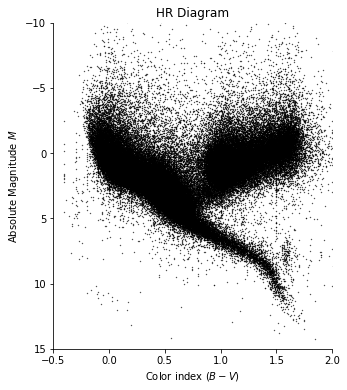

In [ ]:
fig, ax = plt.subplots(figsize=(5,6))

scatter_2D(hip_BV_df['B-V'], hip_BV_df['AbsMag'], ax=ax)
ax.set_xlim(-0.5,2.0)
ax.set_ylim(15,-10)
ax.set_title('HR Diagram')
ax.set_xlabel('Color index $(B-V)$')
ax.set_ylabel('Absolute Magnitude $M$')

### B. HRD coloreado con colores `RdYlBu_r`.

- Estilizar el HRD con `RdYlBu_r colores` para que coincida con el índice de color B-V.

In [ ]:
from matplotlib import colors

In [ ]:
divnorm = colors.TwoSlopeNorm(vmin=-0.4, vcenter=0.4, vmax=2.0)

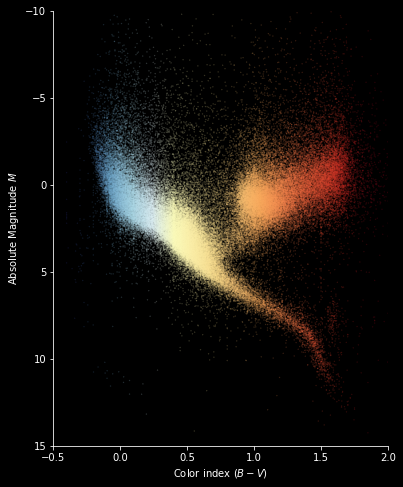

In [ ]:
import matplotlib as mpl

with plt.style.context('dark_background'):
    
    fig, ax = plt.subplots(figsize=(6,8))

    scatter_2D(hip_BV_df['B-V'], hip_BV_df['AbsMag'], ax=ax, 
               c=hip_BV_df['B-V'], cmap='RdYlBu_r', norm=divnorm, alpha=0.3)

    ax.set(xlabel='Color index $(B-V)$', ylabel='Absolute Magnitude $M$', 
           xlim=(-0.5,2.0), ylim=(15,-10))

### C. HRD coloreado con sus colores de índice B-V

Clases espectrales separadas OBAFGKM.

- Definir cada clase espectral y asignar sus colores específicos a partir del índice de color B-V de la parte introductoria anterior.

In [ ]:
#hip_OB_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("O","B")) == True]
hip_O_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("O")) == True]
hip_B_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("B")) == True]
hip_A_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("A")) == True]
hip_F_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("F")) == True]
hip_G_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("G")) == True]
hip_K_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("K")) == True]
hip_M_df = hip_BV_df[hip_BV_df['SpType'].str.startswith(("M")) == True]

sptype_len_list = [hip_O_df, hip_B_df, hip_A_df, hip_F_df, hip_G_df, hip_K_df, hip_M_df]
sptype_list = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
col_list = ['#9bb2ff', '#a7bcff', '#d1dbff', '#f7f5ff', '#fff3ea', '#ffead5', '#ffcf95']

- Comprobar cuántas estrellas tiene cada tipo espectral y mira si coinciden con los datos visualizados.

In [ ]:
for i,j in zip(sptype_len_list, sptype_list):
    print("Type {}: {} stars".format(j, len(i)))

Type O: 190 stars
Type B: 9561 stars
Type A: 18188 stars
Type F: 25038 stars
Type G: 22172 stars
Type K: 30801 stars
Type M: 4449 stars


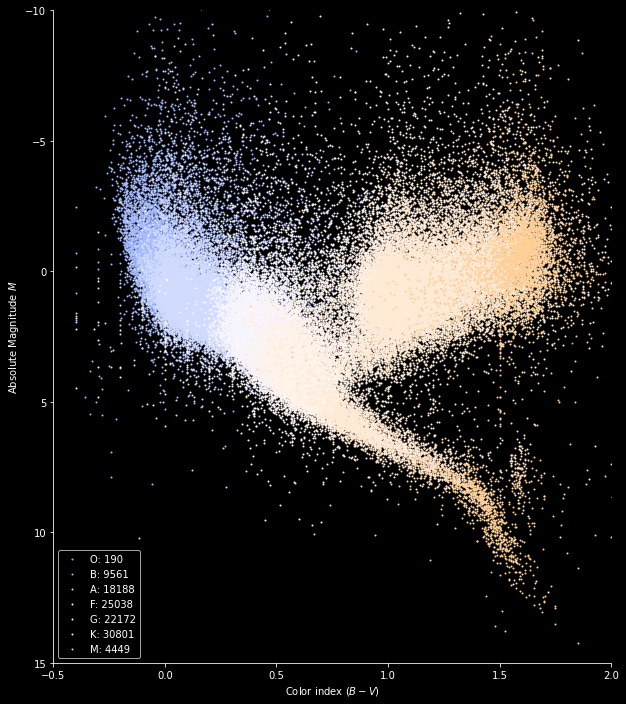

In [ ]:
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(10,12))

    for df,label,color in zip(sptype_len_list, sptype_list, col_list):

        scatter_2D(df['B-V'], df['AbsMag'], ax=ax, c=color, s=1, 
                   label='{}: {}'.format(label, len(df)))

    ax.set(xlabel='Color index $(B-V)$', ylabel='Absolute Magnitude $M$', 
           xlim=(-0.5,2.0), ylim=(15,-10))
    ax.legend()

- Por desgracia, sigue siendo difícil distinguir entre los tipos espectrales consecutivos.

### D. Trazar cada tipo espectral por separado

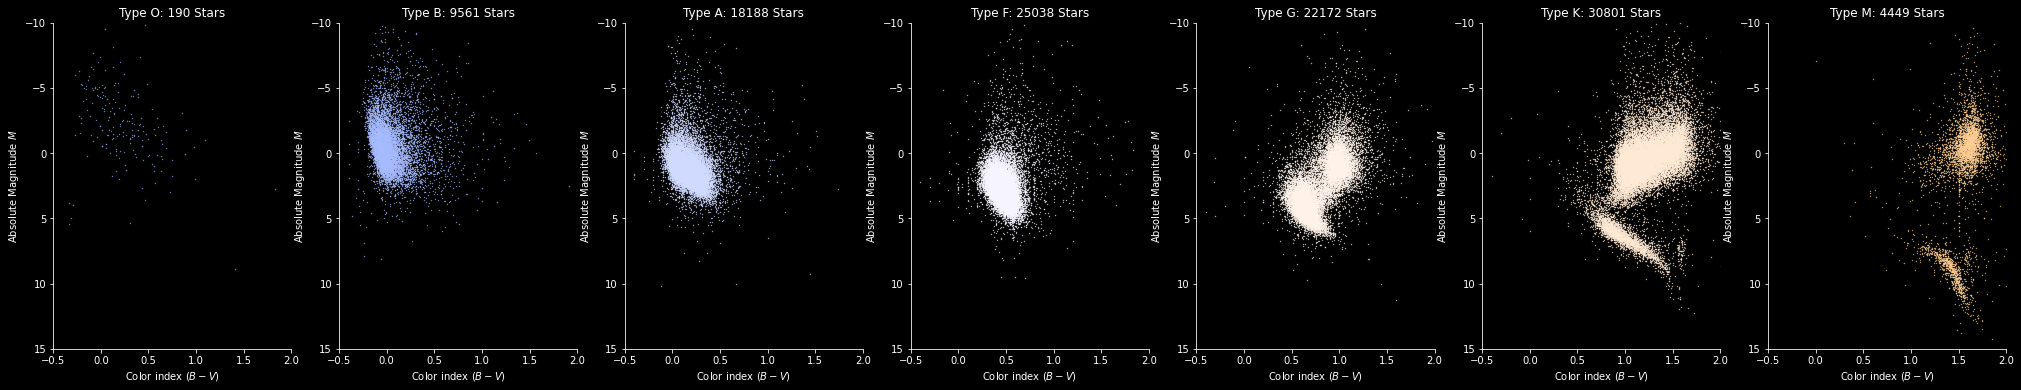

In [ ]:
with plt.style.context('dark_background'):
    
    fig, axs = plt.subplots(1,7, figsize=(35,6))
    for df, label, color, ax in zip(sptype_len_list, sptype_list, col_list, axs.reshape(-1)):
        scatter_2D(df['B-V'], df['AbsMag'], ax=ax, 
                   c=color)

        ax.set(title='Type {}: {} Stars'.format(label, len(df)), 
               xlabel='Color index $(B-V)$', 
               ylabel='Absolute Magnitude $M$', 
               xlim=(-0.5,2.0), ylim=(15,-10))